In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np

# 초기 데이터: 각 원소가 샘플입니다.(이 예에서 하나의 샘플이 하나의 문장입니다. 하지만 문서 전체가 될 수도 있습니다.)
samples = ['The cat set on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축합니다.
token_index = {}
for sample in samples:
    # split()메서드를 사용하여 샘플을 토큰으로 나눕니다. 실전에서는 구두점과 특수 문자도 사용합니다.
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스를 할당합니다. 인덱스 0은 사용하지 않습니다
            token_index[word] = len(token_index) + 1
            
# 샘플을 벡터로 변환합니다. 각 샘플에서 max_length까지 단어만 사용합니다.
max_length = 10

# 결과를 저장할 배열입니다.
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, word in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [4]:
import string

samples = ['The cat set on the mat.', 'The dog ate my homework.']
# 출력 가능한 모든 아스키(ASCII)문자
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [5]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat set on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=1000)
# 단어에 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)
# 직접 원-핫 이진 벡터 표현을 얻을 수 있습니다. 원-핫 인코딩 외에 다른 벡터화 방법들도 제공합니다.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# 계산된 단어 인덱스를 구합니다.
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

9개의 고유한 토큰을 찾았습니다.


In [6]:
samples = ['The cat set on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다. 1,000개(또는 그 이상)의 단어가 있다면 
# 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [7]:
from keras.layers import Embedding

# Embedding 층은 적어도 2개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

In [8]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
maxlen = 20 

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를(samples, maxlen)크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
# Embedding 층의 출력 크기는 (samples, maxlen, 8)이 됩니다.
model.add(Embedding(10000, 8, input_length=maxlen))

# 3D 임베딩 텐서클(smaples, maxlen * 8)크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

model.add(Dense(1, activation='sigmoid')) # 분류기를 추가합니다.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6671 - accuracy: 0.6281 - val_loss: 0.6172 - val_accuracy: 0.6910
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5433 - accuracy: 0.7515 - val_loss: 0.5305 - val_accuracy: 0.7268
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4641 - accuracy: 0.789

In [10]:
import os

imdb_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# 100개 단어 이후는 버립니다.
maxlen = 100
training_samples = 200 # 훈련 샘플은 200개 입니다.
validation_samples = 10000 # 검증 샘플은 10000개 입니다.
max_words = 10000  # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용합니다.

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s 개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후 긍정 샘플이 나옵니다) 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582 개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [12]:
glove_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [13]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 89ms/step - loss: 1.9158 - accuracy: 0.5700 - val_loss: 0.7052 - val_accuracy: 0.5215
Epoch 2/10
7/7 [==============================] - 0s 61ms/step - loss: 0.5184 - accuracy: 0.7500 - val_loss: 1.0908 - val_accuracy: 0.4995
Epoch 3/10
7/7 [==============================] - 0s 71ms/step - loss: 0.4103 - accuracy: 0.8350 - val_loss: 0.9258 - val_accuracy: 0.5120
Epoch 4/10
7/7 [==============================] - 1s 84ms/step - loss: 0.5350 - accuracy: 0.7150 - val_loss: 0.9732 - val_accuracy: 0.5124
Epoch 5/10
7/7 [==============================] - 0s 62ms/step - loss: 0.2870 - accuracy: 0.8750 - val_loss: 0.8384 - val_accuracy: 0.5226
Epoch 6/10
7/7 [==============================] - 1s 85ms/step - loss: 0.1134 - accuracy: 0.9850 - val_loss: 0.8393 - val_accuracy: 0.5347
Epoch 7/10
7/7 [==============================] - 1s 77ms/step - loss: 0.1627 - accuracy: 0.9400 - val_loss: 1.1534 - val_accuracy: 0.5087
Epoch 8/10
7/7 [===========

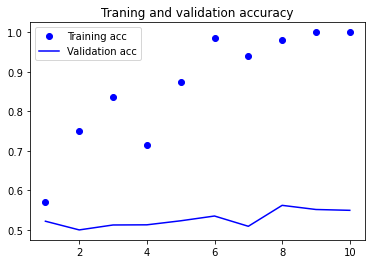

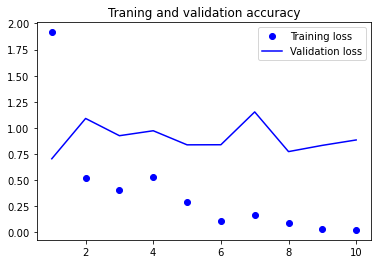

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 97ms/step - loss: 0.6882 - accuracy: 0.5600 - val_loss: 0.6925 - val_accuracy: 0.5198
Epoch 2/10
7/7 [==============================] - 1s 72ms/step - loss: 0.4968 - accuracy: 0.9700 - val_

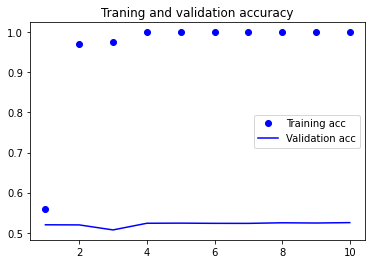

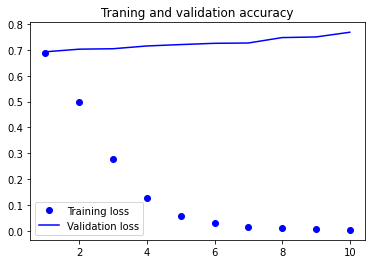

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [20]:
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [21]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 2s 25ms/step - loss: 0.6274 - accuracy: 0.6225 - val_loss: 0.6807 - val_accuracy: 0.5859
Epoch 2/10
63/63 [==============================] - 1s 21ms/step - loss: 0.1630 - accuracy: 0.9895 - val_loss: 0.6382 - val_accuracy: 0.6580
Epoch 3/10
63/63 [==============================] - 1s 21ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.6570 - val_accuracy: 0.6821
Epoch 4/10
63/63 [==============================] - 2s 27ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7900 - val_accuracy: 0.6785
Epoch 5/10
63/63 [==============================] - 2s 26ms/step - loss: 9.9577e-05 - accuracy: 1.0000 - val_loss: 0.7649 - val_accuracy: 0.7037
Epoch 6/10
63/63 [==============================] - 1s 21ms/step - loss: 6.3992e-06 - accuracy: 1.0000 - val_loss: 0.8662 - val_accuracy: 0.7082
Epoch 7/10
63/63 [==============================] - 1s 21ms/step - loss: 6.1562e-07 - accuracy: 1.0000 - val_loss: 0.9069 - val_accuracy: 0.7098
E

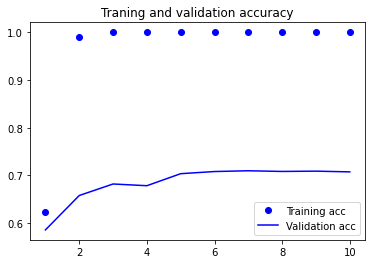

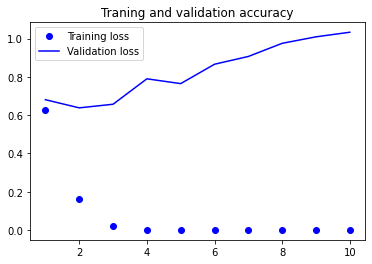

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [23]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []


for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [24]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.8832 - accuracy: 0.5553


[0.8831549286842346, 0.5552800297737122]

# 순환 신경망 이해하기

In [25]:
# 타임스탭 t의 상태입니다.
state_t = 0
# 시퀀스의 원소를 반복합니다.
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    # 출력은 다음 반복을 위한 상태가 됩니다.
    state_t = output_t

NameError: name 'input_sequence' is not defined

In [26]:
state_t =0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

NameError: name 'input_sequence' is not defined

In [27]:
import numpy as np

# 입력 시퀀스에 있는 타임스탭의 수
timesteps = 100
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

# 입력 데이터: 예제를 위해 생성한 난수
inputs = np.random.random((timesteps, input_features))

# 초기 상태: 모두 0인 벡터
state_t = np.zeros((output_features, ))

# 랜덤한 가중치 행렬을 만듭니다.
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
# input_t는 크기가 (input_features, )인 벡터입니다.
for input_t in inputs:
    # 입력과 현재 상태(이전 출력)를 연결하여 현재 출력을 얻습니다.
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # 이 출력을 리스트에 저장합니다.
    successive_outputs.append(output_t)
    # 다음 타임스텝을 위해 네트워크의 상태를 업데이트합니다.
    state_t = output_t
    
# 최종 출력은 크기가 (timesteps, output_features)인 2D 텐서 입니다.
final_output_sequence = np.stack(successive_outputs, axis=0)

In [28]:
import tensorflow as tf
from keras.layers import SimpleRNN

In [31]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [32]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [33]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.datasets import imdb
from keras.preprocessing import sequence

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용합니다.)
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기 (25000, 500)


In [36]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 106ms/step - loss: 0.5919 - accuracy: 0.6738 - val_loss: 0.4577 - val_accuracy: 0.7962
Epoch 2/10
157/157 [==============================] - 17s 109ms/step - loss: 0.3596 - accuracy: 0.8532 - val_loss: 0.4456 - val_accuracy: 0.8002
Epoch 3/10
157/157 [==============================] - 17s 106ms/step - loss: 0.2599 - accuracy: 0.9010 - val_loss: 0.3455 - val_accuracy: 0.8672
Epoch 4/10
157/157 [==============================] - 18s 112ms/step - loss: 0.2141 - accuracy: 0.9233 - val_loss: 0.4337 - val_accuracy: 0.7968
Epoch 5/10
157/157 [==============================] - 17s 108ms/step - loss: 0.1493 - accuracy: 0.9466 - val_loss: 0.4281 - val_accuracy: 0.8154
Epoch 6/10
157/157 [==============================] - 17s 109ms/step - loss: 0.1031 - accuracy: 0.9651 - val_loss: 0.4918 - val_accuracy: 0.8252
Epoch 7/10
157/157 [==============================] - 17s 108ms/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 0.5123 - val_ac

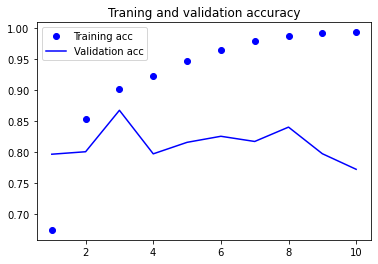

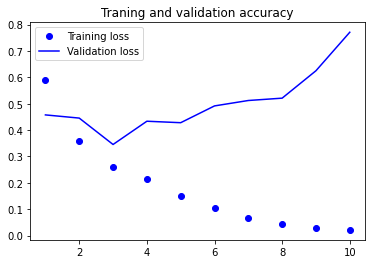

In [37]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [38]:
output_t = activation(c_t) * activation((input_t, Wo) +dot(state_t, Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

NameError: name 'activation' is not defined

In [39]:
c_t + 1 = i_t * k_t + c_t * f_t

SyntaxError: cannot assign to operator (<ipython-input-39-6846fcf83692>, line 1)